# Практические задания к уроку 5
# Тема “Элементы теории вероятностей”
https://docs.google.com/document/d/1UcT9ELM3p25ByAVUFDPd01tfcs4N0W23QY7otL_G5sc/

In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

## 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [2]:
black = {2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35}

for i in range(0, 5):
    a = input()
    x = np.random.randint(0, 37)
    if x == 0:
        print('green\t', x)
    elif x in black:
        print('black\t', x)
    else:
        print('red\t', x)


black	 8

black	 35

black	 35

black	 13

red	 9


## 2.1. Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [3]:
#вероятность выпадения какого-либо набора полей в рулетке ('или')
def casino_roulette(fields=['black', 'green', 'red']):
    f_dict = {'black': 18/37, 'green': 1/37, 'red': 18/37}
    proba = 0
    for field in fields:
        proba += f_dict[field]
    return proba

In [4]:
casino_roulette(['black', 'green'])

0.5135135135135136

In [5]:
casino_roulette(['black'])

0.4864864864864865

In [6]:
casino_roulette(['black', 'red'])

0.972972972972973

## 2.2. Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы  +х0+ …+ х 9. 

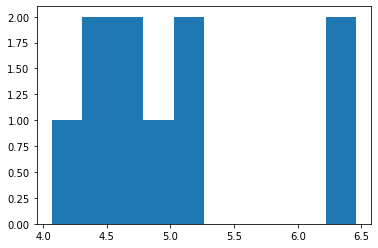

In [7]:
summ = []
for i in range(10):
    summ.append(np.sum(np.random.rand(10)))

plt.hist(summ)
plt.show()

## 3.1. Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [8]:
def combinations(n, k):
    return int(np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k)))

def bernulli(p, n, k):
    return combinations(n, k) * p ** k * (1 - p) ** (n - k)

In [9]:
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
# v=(0.5**k)*(0.5**(n-k))
#print(a, b, c, d)
#print(x)
print(k, n, k/n, bernulli(p=0.5, n=4, k=2))

3754 10000 0.3754 0.375


## 3.2. Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [10]:
def monte_carlo(n_, n, k):
    a = np.array([np.random.randint(0, 2, n_) for i in range(n)])
    x = np.sum(a, axis=0)
    k_ = 0
    for i in range(0, n_):
        if x[i] == k:
            k_ += 1

    return '{:5d} {} {:5.3f} {:5.3f}'.format(k_, n_, k_/n_, bernulli(p=0.5, n=n, k=k))

In [11]:
for i in range(5):
    print(i, monte_carlo(10000, 4, i))

0   576 10000 0.058 0.062
1  2454 10000 0.245 0.250
2  3770 10000 0.377 0.375
3  2474 10000 0.247 0.250
4   638 10000 0.064 0.062


In [12]:
for i in range(7):
    print(i, monte_carlo(10000, 6, i))

0   139 10000 0.014 0.016
1   923 10000 0.092 0.094
2  2358 10000 0.236 0.234
3  3060 10000 0.306 0.312
4  2362 10000 0.236 0.234
5   933 10000 0.093 0.094
6   153 10000 0.015 0.016


## 4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [13]:
def arrangements(n, k):
    return int(np.math.factorial(n) / np.math.factorial(n - k))

In [14]:
def permutations(n):
    return np.math.factorial(n)

In [15]:
#сочетания
print('Вариантов:', combinations(3, 1))
for p in itertools.combinations("123", 1):
    print(''.join(p))

Вариантов: 3
1
2
3


In [16]:
#сочетания
print('Вариантов:', combinations(3, 2))
for p in itertools.combinations("123", 2):
    print(''.join(p))

Вариантов: 3
12
13
23


In [17]:
#сочетания
print('Вариантов:', combinations(3, 3))
for p in itertools.combinations("123", 3):
    print(''.join(p))

Вариантов: 1
123


In [18]:
#размещения
print('Вариантов:', arrangements(3, 1))
for p in itertools.permutations("123", 1):
    print(''.join(p))

Вариантов: 3
1
2
3


In [19]:
#размещения
print('Вариантов:', arrangements(3, 2))
for p in itertools.permutations("123", 2):
    print(''.join(p))

Вариантов: 6
12
13
21
23
31
32


In [20]:
#перестановка
print('Вариантов:', arrangements(3, 3), 'или', permutations(3))
for p in itertools.permutations("123", 3):
    print(''.join(str(x) for x in p))

Вариантов: 6 или 6
123
132
213
231
312
321


## 5. Дополните код расчетом коэффициента корреляции x и y по формуле
$\displaystyle R = \frac{\Sigma(x_i - x_m)(y_i - y_m)}{\sqrt{\Sigma(x_i - x_m)^2\Sigma(y_i - y_m)^2}} $

0.719344174525071 0.14476824925671686
0.7193441745250704 0.144768249256717
0.9142847241840408


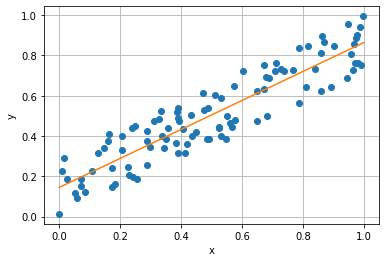

In [21]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y, rcond=None)[0]
print(a, b)
print(a1, b1)

R = np.sum((x - np.mean(x))*(y - np.mean(y))) / \
    np.sqrt(np.sum((x - np.mean(x))**2)*np.sum((y - np.mean(y))**2))
print(R)

plt.plot([0, 1], [b, a + b])
plt.show()